In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from skimage.feature import local_binary_pattern
import os
import numpy as np
import seaborn as sns
import math

In [2]:
folder = 'data/MachinedPart02'
img_part = folder+'/part02.jpg'

In [3]:
ok_imgs = os.listdir(folder+'/Ok')
defects_imgs = os.listdir(folder+'/Defects')

In [4]:
props = ['contrast', 'dissimilarity', 'correlation', 'homogeneity', 'energy', 'ASM', ]
props_reduced = ['cont', 'diss', 'hom', 'ene', 'ASM', 'corr']
radians = np.concatenate((np.arange(0, np.pi, np.pi/8), [np.pi]))
degrees = [math.degrees(value) for value in radians] 
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))

In [5]:
img_ok = plt.imread(folder+'/Ok/'+ok_imgs[0])
gray_ok = cv2.cvtColor(img_ok, cv2.COLOR_BGR2GRAY)
clahe_ok = clahe.apply(gray_ok)
sobely_ok = cv2.Sobel(clahe_ok,cv2.CV_8U,0,1,ksize=5)

In [6]:
img_defect = plt.imread(folder+'/Defects/'+defects_imgs[0])
gray_defect = cv2.cvtColor(img_defect, cv2.COLOR_BGR2GRAY)
clahe_defect = clahe.apply(gray_defect)
sobely_defect = cv2.Sobel(clahe_defect,cv2.CV_8U,0,1,ksize=5)

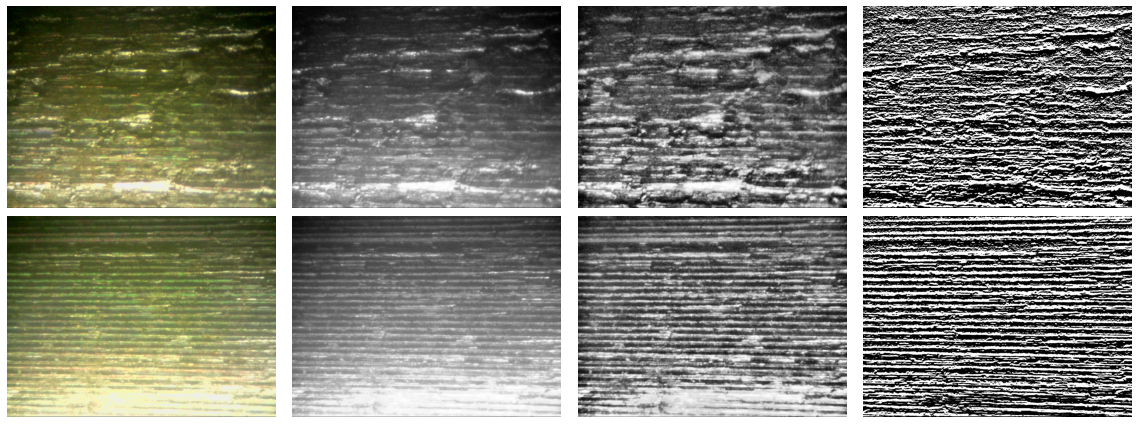

In [7]:
f, axs = plt.subplots(2,4,figsize=(16,6))
axs[1][0].imshow(img_ok)
axs[1][0].axis('off')
axs[1][1].imshow(gray_ok, cmap='gray')
axs[1][1].axis('off')
axs[1][2].imshow(clahe_ok, cmap='gray')
axs[1][2].axis('off')
axs[1][3].imshow(sobely_ok, cmap='gray')
axs[1][3].axis('off')

axs[0][0].imshow(img_defect)
axs[0][0].axis('off')
axs[0][1].imshow(gray_defect, cmap='gray')
axs[0][1].axis('off')
axs[0][2].imshow(clahe_defect, cmap='gray')
axs[0][2].axis('off')
axs[0][3].imshow(sobely_defect, cmap='gray')
axs[0][3].axis('off')
f.tight_layout()
plt.savefig('lbp_data.png', dpi=200)
plt.show()

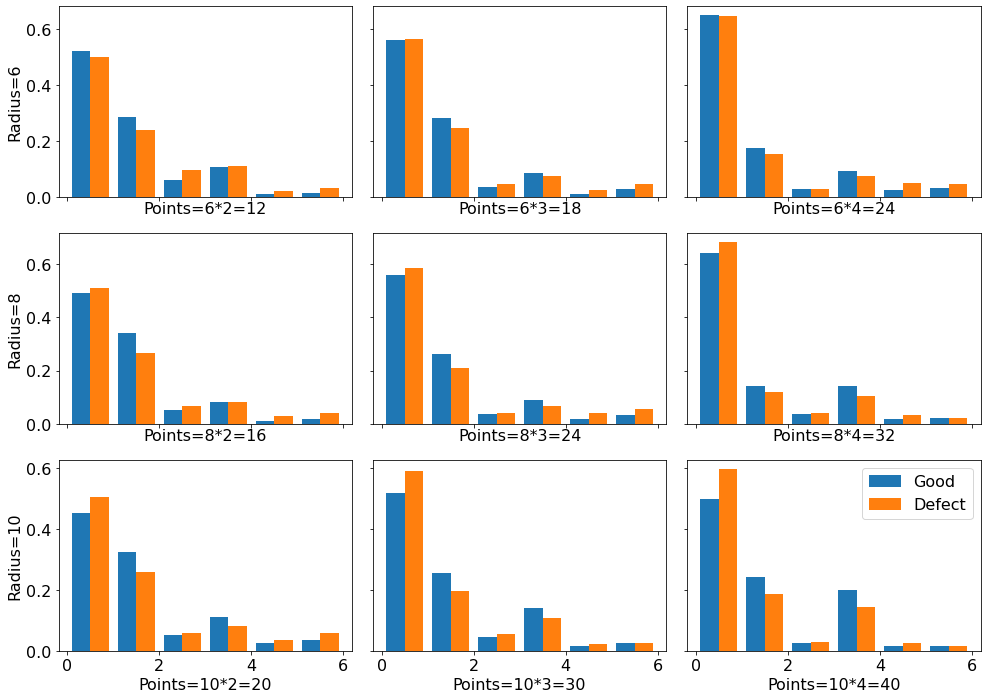

In [9]:
plt.rcParams.update({'font.size': 16})
f, axs = plt.subplots(3,3,figsize=(14,10), sharey='row', sharex='col')
n_bins=6

for row_id, radius in zip(range(3),[6,8,10]):
    for col_id, n in zip(range(3),[2,3,4]): 
        n_points = n * radius
        lbp_ok = local_binary_pattern(sobely_ok, n_points, radius)
        lbp_defect = local_binary_pattern(sobely_defect, n_points, radius)

        ax = axs[row_id][col_id]
        #ax.hist(lbp_ok.ravel(), alpha=0.5, density=True, bins=n_bins, range=(0, n_bins), label='Good')
        #ax.hist(lbp_defect.ravel(), alpha=0.5, density=True, bins=n_bins, range=(0, n_bins), label='Defect')
        ax.hist([lbp_ok.ravel(),lbp_defect.ravel()], density=True, bins=n_bins, range=(0, n_bins), label=['Good','Defect'])
        ax.set_xlabel('Points='+str(radius)+'*'+str(n)+'='+str(n_points))

axs[0][0].set_ylabel('Radius=6')
axs[1][0].set_ylabel('Radius=8')
axs[2][0].set_ylabel('Radius=10')

plt.legend()
f.tight_layout()
plt.savefig('lbp_results.png', dpi=200)
plt.show()